# Линейная классификация: логистическая регрессия и метрики качества

## Дедлайн:
9 ноября, 23:59


![raven](./moon_raven.jpg)

В этом задании мы будем, используя метеоданные из Австралии, отвечать на вопрос: "будет ли завтра дождь". Построив модель, оценим её качество, используя пройденные метрики качества классификации. В качестве базовой модели предлагается использовать логистическую регрессию. Чтобы вспомнить о том, что значат все эти слова, можно ознакомиться с приложенными к заданию pdf, лекциями с 5 по 8 [данного плейлиста](https://www.youtube.com/playlist?list=PLEwK9wdS5g0oZwFwoQT-BrjmkazJWXxfe) или любыми другими источниками.

Импортируем библиотеки и прочитаем датасет:

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

data = 'weatherAUS.csv'

df = pd.read_csv(data)

In [2]:
import warnings

warnings.filterwarnings('ignore')

### Знакомство с данными

In [3]:
# preview the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

Признаки:

Location - The common name of the location of the weather station

MinTemp - The minimum temperature in degrees celsius

MaxTemp - The maximum temperature in degrees celsius

Rainfall - The amount of rainfall recorded for the day in mm

Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine - The number of hours of bright sunshine in the day

WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindGust9am - Direction of the wind at 9am

WindGust3pm - Direction of the wind at 3pm

WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am - Humidity (percent) at 9am

Humidity3pm - Humidity (percent) at 3pm

Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. 

Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm

Temp9am - Temperature (degrees C) at 9am

Temp3pm - Temperature (degrees C) at 3pm

RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow - будет ли дождь завтра (целевая переменная).

#### 1. [0.5 балла] Посмотрите на баланс классов целевой переменной, постройте лучшую константную модель и выведите долю правильных ответов (accuracy) этой модели:

In [5]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [6]:
# Лучшая константная модель будет, когда у нас df['RainTomorrow'] == No, посчитаем вероятность правильного ответа


In [7]:
len(df[df['RainTomorrow'] == 'No'])/df['RainTomorrow'].size

0.7583940602227417

In [8]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Как мы видим, у нас в данных есть пропуски, и есть категориальные переменные, которые требуют предварительной подготовки для логистической регрессии.

#### 2. [1 балл] Разделите датасет на train и test в пропорции 80/20. Вспомните о важности перемешивания данных. Будем ли мы это делать сегодня? Почему?
Ответ:

In [9]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

In [11]:
y_test

100721    Yes
30234      No
68427     NaN
28624      No
31173      No
         ... 
57136     Yes
30386      No
17904      No
128313     No
80574      No
Name: RainTomorrow, Length: 29092, dtype: object

### Да, надо перемешивать данные, потому что перемешивание данных влияет только на то, кто в итоге окажется в train и test. Если данные шли какими-то группами, например сначала 800 картинок с кошками, а за ними 200 картинок с собаками, а train_test_split был совершён в пропорции 0.8, то модель просто не увидит собак в трейне.

### Категориальные признаки

In [12]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']
categorical.remove('RainTomorrow') # target

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


Прежде, чем преобразовывать категориальные признаки, неплохо бы понять их природу. Например, принципиально важно, сколько уникальных значений принимает каждый из них, от этого зависит способ обработки.  

#### 3. [0.5 балла]  Выведите число уникальных значений, которое принимает каждый категориальный признак.

In [13]:
for i in categorical:
    print(i, df[i].nunique())

Date 3436
Location 49
WindGustDir 16
WindDir9am 16
WindDir3pm 16
RainToday 2


#### 4. [1.5 балла]  Подготовьте категориальные признаки к дальнейшей работе: выберите для каждого из них способы кодирования и заполнения пропусков и реализуйте.

Подсказка: One Hot Encoding подойдет для большинства признаков, но не для всех.

Подсказка: Помните, что методы, заполняющие пропуски, обучаются только на train, применяются на train и test.

#### Для признаков с количеством уникальных значений = 16 и для RainToday будем использовать OHE.
#### Категорию Date переведем по умному и оставим только месяц переведенный в число
#### Location будем преобразовывать с помощью LebelEncoder

In [14]:
df.isnull().sum()/df.size #сколько всего пропусков

Date             0.000000
Location         0.000000
MinTemp          0.000444
MaxTemp          0.000377
Rainfall         0.000975
Evaporation      0.018768
Sunshine         0.020874
WindGustDir      0.003086
WindGustSpeed    0.003068
WindDir9am       0.003158
WindDir3pm       0.001264
WindSpeed9am     0.000528
WindSpeed3pm     0.000915
Humidity9am      0.000793
Humidity3pm      0.001347
Pressure9am      0.004503
Pressure3pm      0.004492
Cloud9am         0.016705
Cloud3pm         0.017742
Temp9am          0.000528
Temp3pm          0.001079
RainToday        0.000975
RainTomorrow     0.000977
dtype: float64

In [15]:
df.isnull().sum().sum() # общее количество 

343248

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### Во всех переменных очень много пропусков. Sunshine, Evaporation пропущено более 10% значений, я не могу просто заполнить их средними или средними значениями. Я отбросил эти 2 столбца. 

#### Сразу с помощью LabelEncoding() заменил в результирующем столбце значения: 'No' как 0 и 'Yes' как 1 и посчитаем корреляцию

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
mode = (df['RainTomorrow']).mode().iloc[0]
df['RainTomorrow'].fillna(mode,inplace=True)
df['RainTomorrow'] = pd.DataFrame(le.fit_transform(df['RainTomorrow']))

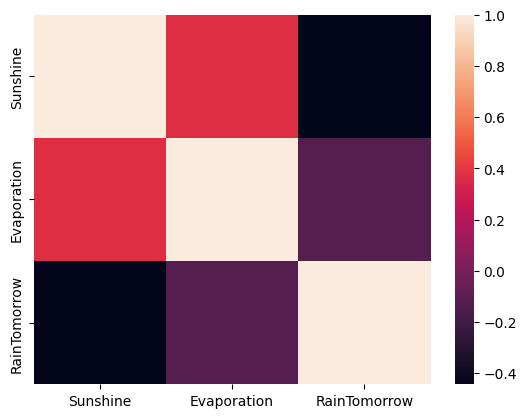

In [18]:
sns.heatmap(df[['Sunshine','Evaporation','RainTomorrow']].corr()); # видно, что близкой корреляции нет ни у одного столбца с RainTommorow

In [19]:
ind_missing = ['Evaporation','Sunshine']
df = df.drop(ind_missing, axis=1)
numerical = [var for var in df.columns if df[var].dtype!='O']

#### Поэтому мы выбросим эти признаки из нашего датасета (учитывая, что они не сильно коррелируют с таргетом, у них много пробелов в данных и некоторые из них коррелируют сами с собой, что тоже плохо для наших итоговых результатов)

In [20]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0


In [21]:
df.isnull().sum().sum() #количество пропущенных резко уменьшилось 

207356

In [22]:
from sklearn.preprocessing import  LabelEncoder
df['Date'] = pd.to_datetime(df['Date']).dt.month #пропусков нет в Date
# изменим Date и перевед дату в конкретное число месяца, потому что результат напрямую зависит от месяца
le = LabelEncoder()
mode = (df['RainToday']).mode().iloc[0]
df['RainToday'].fillna(mode,inplace=True)
df['Location'] = pd.DataFrame(le.fit_transform(df['Location'])) #Пропусков в Location нет 


In [24]:
# заполним все пропуски модой в некоторых признаках
for i in ['WindGustDir','WindDir9am','WindDir3pm', 'MinTemp','MaxTemp','Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Cloud9am','Cloud3pm']:
    mode = (df[i]).mode().iloc[0]
    df[i].fillna(mode,inplace=True)


In [25]:
df.isnull().sum()#все пропуски ушли

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [26]:
df = pd.get_dummies(df, columns=['WindGustDir'])
df = pd.get_dummies(df, columns=['WindDir9am'])
df = pd.get_dummies(df, columns=['WindDir3pm'])
df = pd.get_dummies(df, columns=['RainToday'])
new_order = [col for col in df.columns if col != 'RainTomorrow'] + ['RainTomorrow']
df = df.reindex(columns=new_order)

In [27]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow
0,12,2,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,1,0,1,0,0
1,12,2,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,1,1,0,0
2,12,2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,1,1,0,0
3,12,2,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,1,0,0
4,12,2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,1,0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 67 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             145460 non-null  int64  
 1   Location         145460 non-null  int32  
 2   MinTemp          145460 non-null  float64
 3   MaxTemp          145460 non-null  float64
 4   Rainfall         145460 non-null  float64
 5   WindGustSpeed    145460 non-null  float64
 6   WindSpeed9am     145460 non-null  float64
 7   WindSpeed3pm     145460 non-null  float64
 8   Humidity9am      145460 non-null  float64
 9   Humidity3pm      145460 non-null  float64
 10  Pressure9am      145460 non-null  float64
 11  Pressure3pm      145460 non-null  float64
 12  Cloud9am         145460 non-null  float64
 13  Cloud3pm         145460 non-null  float64
 14  Temp9am          145460 non-null  float64
 15  Temp3pm          145460 non-null  float64
 16  WindGustDir_E    145460 non-null  uint

### Числовые признаки

In [30]:
# find numerical variables

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 15 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']


In [31]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0


In [32]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
count  145460.0  145460.0  145460.0       145460.0      145460.0   
mean       12.0      23.0       2.0           40.0          14.0   
std         6.0       7.0       8.0           13.0           9.0   
min        -8.0      -5.0       0.0            6.0           0.0   
25%         8.0      18.0       0.0           31.0           7.0   
50%        12.0      22.0       0.0           37.0          13.0   
75%        17.0      28.0       1.0           46.0          19.0   
max        34.0      48.0     371.0          135.0         130.0   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count      145460.0     145460.0     145460.0     145460.0     145460.0   
mean           19.0         69.0         52.0       1018.0       1015.0   
std             9.0         19.0         20.0          7.0          7.0   
min             0.0          0.0          0.0        980.0        977.0   
25%         

Некоторые (или все?) числовые признаки содержат пропуски, некоторые могут содержать выбросы.

#### 5. [0.5 балла]  Посмотрите на вывод метода describe. Какие признаки скорее всего содержат выбросы?  

Подсказка: предлагается найти до 4х таких столбцов.

In [33]:
df.describe()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,...,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,6.399615,23.793524,12.181844,23.193422,2.307990,39.679967,13.982160,18.543455,69.430373,51.553396,...,0.103575,0.064616,0.056070,0.064306,0.069504,0.061006,0.065434,0.780833,0.219167,0.219146
std,3.427262,14.228687,6.366881,7.094412,8.389771,13.181471,8.878266,8.754403,19.280872,20.471345,...,0.304709,0.245847,0.230058,0.245299,0.254310,0.239343,0.247291,0.413683,0.413683,0.413669
min,1.000000,0.000000,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,11.000000,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,6.000000,24.000000,11.900000,22.500000,0.000000,37.000000,13.000000,17.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,9.000000,36.000000,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,84.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,12.000000,48.000000,33.900000,48.100000,371.000000,135.000000,130.000000,87.000000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Ответ: Можно выявить потенциальные выбросы в данных, сравнив максимальные значения признаков с их 75-ми процентилями (3-ми квартилями). Если максимум сильно больше 75-го процентиля, это может быть признаком выбросов.

Например, в этих данных возможны выбросы в следующих признаках:

Rainfall: 75-й процентиль - 0.6, максимум - 371.0. WindSpeed3pm: 75-й процентиль - 24.0, максимум - 87.0. WindGustSpeed: 75-й процентиль - 46.0, максимум - 135.0. WindSpeed9am: 75-й процентиль - 19.0, максимум - 130.0.

#### 6. [0.5 балла] Найдите выбросы и удалите их

Подсказка: попробуйте построить гистограммы, вспомните, что такое boxplot и как он строится

In [35]:
numerical = numerical[:-1] # у нас засчиталось при переводе RainTomorrow как данные с выбросами этого нам не надо

In [36]:
for x in numerical:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [37]:
df.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow
0,12,2,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,...,0,0,0,0,0,1,0,1,0,0
1,12,2,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,...,0,0,0,0,0,0,1,1,0,0
2,12,2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,...,0,0,0,0,0,0,1,1,0,0
3,12,2,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,...,0,0,0,0,0,0,0,1,0,0
4,12,2,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,...,0,0,0,0,0,0,0,1,0,0


#### 7. [1 балл]  Заполните пропуски в числовых признаках. 

In [38]:
for i in numerical:
    df[i].fillna(df[i].mean(), inplace=True)

#### 8. [0.5 балла] Сделайте нормализацию данных перед обучением.

In [39]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit_transform(df)

array([[1.        , 0.04166667, 0.53314917, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.04166667, 0.36740331, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.04166667, 0.51933702, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.45454545, 0.85416667, 0.3121547 , ..., 1.        , 0.        ,
        0.        ],
       [0.45454545, 0.85416667, 0.37845304, ..., 1.        , 0.        ,
        0.        ],
       [0.45454545, 0.85416667, 0.57458564, ..., 1.        , 0.        ,
        0.        ]])

#### 9. [0.5 балла] Обучите логистическую регрессию на полученном датасете.

### Заметим, что у нас в выборке очень много признаков с дисбалансом классов. Решим эту проблему с помощью SMOTE.Передискретизация SMOTE – один из самых надежных подходов, который призван предотвратить дисбаланс классов. Он расшифровывается как «Техника передискретизации синтетического меньшинства». Этот метод разработан специально для создания новых образцов, соответствующих второстепенным классам.

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']
smote = SMOTE(random_state=1000)
X, y = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.7587489545274464

#### 10. [0.5 балла] Посчитайте accuracy, precision и recall на обучающей и тестовой выборке.

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

pred_2 = clf.predict(X_train)

accuracy_train = accuracy_score(y_train,pred_2)
precision_train = precision_score(y_train,pred_2)
recall_train = recall_score(y_train,pred_2)

print(f'Обучающая выборка: Accuracy = {accuracy_train}, Precision = {precision_train}, Recall = {recall_train}')

accuracy_test = accuracy_score(y_test,pred)
precision_test = precision_score(y_test,pred)
recall_test = recall_score(y_test,pred)

print(f'Тестовая выборка: Accuracy = {accuracy_test}, Precision = {precision_test}, Recall = {recall_test}')


Обучающая выборка: Accuracy = 0.7542975370325534, Precision = 0.7537246869941528, Recall = 0.7543726235741445
Тестовая выборка: Accuracy = 0.7587489545274464, Precision = 0.7604171230775971, Recall = 0.7595850840336135


#### 11. [1 балл] Попробуйте обучить несколько классификаторов, изменяя параметр регуляризации C. Сравните метрики. О чем говорят результаты?

Ответ: В модели LogisticRegression библиотеки sklearn, коэффициент C является обратным значением силы регуляризации1. Это гиперпараметр, который контролирует степень регуляризации в модели. Регуляризация - это метод, который помогает предотвратить переобучение модели путем штрафа за сложность модели. 

In [49]:
c = np.concatenate([np.arange(0.05,1.5,0.05),np.arange(10,15,1)])
for i in c:
    clf = LogisticRegression(random_state=0,C=i).fit(X_train, y_train)
    pred = clf.predict(X_test)
    print('Точность',clf.score(X_test,y_test),', c =',i)

Точность 0.7582207157635251 , c = 0.05
Точность 0.7572302680811727 , c = 0.1
Точность 0.7575604173086234 , c = 0.15000000000000002
Точность 0.7578025267420875 , c = 0.2
Точность 0.7609499493771185 , c = 0.25
Точность 0.7583747854030022 , c = 0.3
Точность 0.7655280186644363 , c = 0.35000000000000003
Точность 0.7585948848879693 , c = 0.4
Точность 0.7583967953514988 , c = 0.45
Точность 0.7579565963815644 , c = 0.5
Точность 0.7580226262270546 , c = 0.55
Точность 0.7572742879781661 , c = 0.6000000000000001
Точность 0.7576484571026104 , c = 0.6500000000000001
Точность 0.7579786063300612 , c = 0.7000000000000001
Точность 0.7573183078751595 , c = 0.7500000000000001
Точность 0.7577144869481005 , c = 0.8
Точность 0.757604437205617 , c = 0.8500000000000001
Точность 0.7570321785447022 , c = 0.9000000000000001
Точность 0.7585728749394727 , c = 0.9500000000000001
Точность 0.7587489545274464 , c = 1.0
Точность 0.7580006162785579 , c = 1.05
Точность 0.7586609147334595 , c = 1.1
Точность 0.758462825196

#### Видно, что наибольшая точность модели, когда c = 0.35.

Логистическая регрессия предсказывает не просто классы, а их вероятности, поэтому полезно посчитать метрику, не зависящую от выбора порога для классификации:

#### 12. [0.5 балл] Выберите лучшую из получившихся моделей, посчитайте AUC-ROC. 

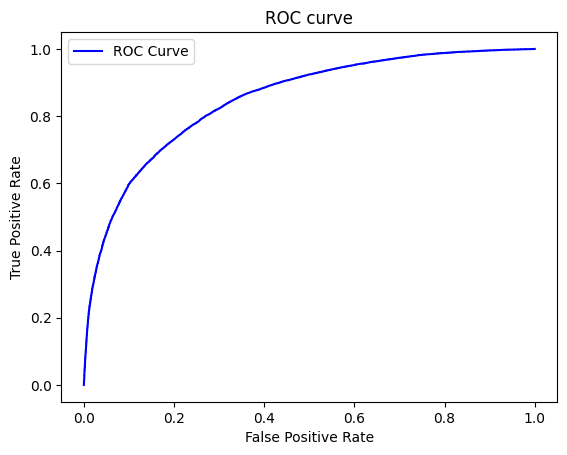

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt
clf = LogisticRegression(random_state=0,C=0.35).fit(X_train, y_train)
scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,scores)
plt.plot(fpr,tpr, label="ROC Curve",color="blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title('ROC curve')
plt.show()

In [45]:
metrics.roc_auc_score(y_test,scores) 

0.8502017405740301

#### 13. [1 балл] Если AUC-ROC > 0.85. Можете продолжать улучшать модель, если это необходимо.

#### Модель очень хорошая, но попробуем улучшить точность, потому что 0.75 это мало. 

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1', 'l2']}
lf = LogisticRegression(C=0.35)
grid_search = GridSearchCV(lf, param_grid, cv=5,scoring='roc_auc')
grid_search.fit(X_train, y_train)
scores_2 = grid_search.predict_proba(X_test)[:, 1]
print("Best parameters: ", grid_search.best_params_,grid_search.best_score_)

Best parameters:  {'penalty': 'l2'} 0.842340169123909


### Как видно, точность повысилась на GridSearchCV, но при этом значение roc_auc все равно выше 0.85

In [48]:
metrics.roc_auc_score(y_test,scores_2)

0.8502017405740301

Одним из преимуществ линейных моделей является то, что после обучения можно оценить вклад каждого признака.

#### 14. [0.5 балл] Какие признаки получились самыми важными? Напишите топ-3:
Ответ:

In [65]:
coef = clf.coef_
features = pd.DataFrame(data = {'Feature': X.columns, 'Coefficient': np.abs(coef.flatten())})
sorted_features = features.sort_values(by='Coefficient', ascending=False)
print(sorted_features)

          Feature  Coefficient
13       Cloud3pm     0.181489
12       Cloud9am     0.107284
64   RainToday_No     0.084889
11    Pressure3pm     0.070607
10    Pressure9am     0.063467
..            ...          ...
14        Temp9am     0.005432
1        Location     0.005127
55  WindDir3pm_NW     0.005008
6    WindSpeed9am     0.003655
65  RainToday_Yes     0.003427

[66 rows x 2 columns]


### Самые важные признаки, те признаки коэффициент, которых по модулю выше всего. Значит такими признаками являются, Cloud3pm, Cloud9am и изменненые признак RainToday с помощью OHE в значении равном 0

![burn](./display.jpeg)

#### Поделитесь впечатлениями от выполнения задания:

#### 15. [0.5 балла]: аккуратный код, красивые и подписанные графики и гистограммы
#### 16. [0.5 балла]: порекомендуйте преподавателю свой любимый фильм или сериал, чтобы он перестал вставлять в ноутбуки картинки из всякого старья. Будьте убедительны!
*Итого*: максимум 11/10

# "1+1" из последних, из старых "Осенний марафон"